## Este arquivo é direcionado para o aprendizado de um ML Project.
#### Objetivo: Estimar o atraso de entregas com base em: Peso, Distância, Região, Condição de Tempo, Carregadores.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
df = pd.read_csv('logistics_data_unprocessed.csv')
display(df)

,order_id,delivery_date,load_weight,distance_km,estimated_time_hours,actual_time_hours,region,weather_condition,delivery_status,carrier
0,ORD9691,2023-02-18,275.72,40.1,6.7,58.5,East,Snowy,Delivered,Carrier_24
1,ORD8464,2023-03-27,179.54,452.2,47.1,27.2,Central,Rainy,Delayed,Carrier_19
2,ORD6618,2023-06-03,492.70,350.4,36.9,54.9,South,Sunny,Delayed,Carrier_29
3,ORD6108,2023-12-05,678.39,393.3,22.4,52.3,West,NaN,Delivered,Carrier_19
4,ORD5478,2023-07-07,525.06,50.4,16.0,48.8,East,NaN,Delivered,Carrier_9
...,...,...,...,...,...,...,...,...,...,...
30152,ORD7061,2023-12-08,NaN,88.5,46.6,NaN,West,Snowy,Delivered,Carrier_40
30153,ORD4617,2023-04-15,NaN,NaN,9.5,11.0,South,Snowy,Cancelled,Carrier_27
30154,ORD6281,2023-01-19,681.52,330.3,13.5,26.0,Central,Sunny,Delivered,Carrier_41
30155,ORD9722,2023-11-13,178.41,120.7,39.5,55.1,West,Snowy,Cancelled,Carrier_44


In [29]:
# Também fazer uma análise de quais carregadores atrasam mais.
# Chance de uma nova entrega atrasar, ser cancelada e a estimativa.
# Transformar isso em um site ou executável.

Verificando informações da tabela
e quantidade de valores vazios

In [9]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30157 entries, 0 to 30156
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   delivery_date      30157 non-null  object 
 1   load_weight        27141 non-null  float64
 2   distance_km        27141 non-null  float64
 3   actual_time_hours  27141 non-null  float64
 4   region             30157 non-null  object 
 5   weather_condition  22570 non-null  object 
 6   delivery_status    30157 non-null  object 
 7   carrier            30157 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.8+ MB
None
delivery_date           0
load_weight          3016
distance_km          3016
actual_time_hours    3016
region                  0
weather_condition    7587
delivery_status         0
carrier                 0
dtype: int64


### Fazer limpeza da tabela, retirando os itens vazios ou substituindo de algumas forma.

In [6]:
## Retirar o Order_ID, único que vai ser totalmente inútil.
## Vou retirar o tempo estimado também, pois além de estar bem distoante do
### Tempo real, pode ser que confunda o modelo de ML.

df = df.drop(columns=["order_id", "estimated_time_hours"])

## Excluindo as linhas vazias (Teste 1)

In [11]:
df = df.dropna(how='any', axis=0)

In [12]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 16412 entries, 0 to 30156
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   delivery_date      16412 non-null  object 
 1   load_weight        16412 non-null  float64
 2   distance_km        16412 non-null  float64
 3   actual_time_hours  16412 non-null  float64
 4   region             16412 non-null  object 
 5   weather_condition  16412 non-null  object 
 6   delivery_status    16412 non-null  object 
 7   carrier            16412 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.1+ MB
None
delivery_date        0
load_weight          0
distance_km          0
actual_time_hours    0
region               0
weather_condition    0
delivery_status      0
carrier              0
dtype: int64


In [13]:
from sklearn.preprocessing import LabelEncoder

codificador1 = LabelEncoder()

for coluna in df.columns:
    if df[coluna].dtype == "object":
        df[coluna] = codificador1.fit_transform(df[coluna])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16412 entries, 0 to 30156
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   delivery_date      16412 non-null  int64  
 1   load_weight        16412 non-null  float64
 2   distance_km        16412 non-null  float64
 3   actual_time_hours  16412 non-null  float64
 4   region             16412 non-null  int64  
 5   weather_condition  16412 non-null  int64  
 6   delivery_status    16412 non-null  int64  
 7   carrier            16412 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.1 MB
None


### Implementar Modelo

In [20]:
y = df['actual_time_hours']
x = df.drop(['actual_time_hours'], axis=1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [21]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()

regression_model.fit(x_train, y_train)

LinearRegression()

In [26]:
from sklearn.metrics import accuracy_score

y_pred = regression_model.predict(x_test)


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 14.72
MSE: 290.29
R² Score: -0.00


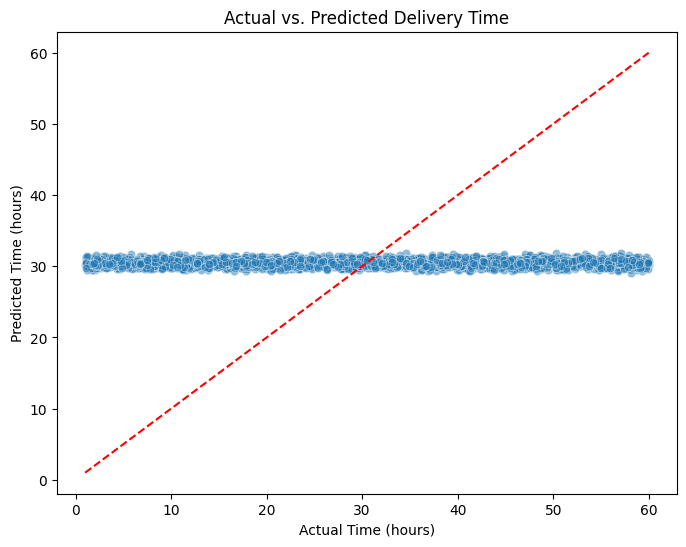

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Perfect predictions line
plt.xlabel("Actual Time (hours)")
plt.ylabel("Predicted Time (hours)")
plt.title("Actual vs. Predicted Delivery Time")
plt.show()

## Teste 2
### Substituindo valores vazios para cada uma das colunas com sua mediana.

In [32]:
# Interpolar seria uma boa técnica para utilizar, mas achei melhor usar a mediana.
## Pois os valores não seguem uma lógica de crescimento ou decressão.

# A condição climática não será preenchida, pois não é um valor que dá pra aleatorizar.
## Mas também não será retirada pois pode ser uma info útil.

# Peso
mediana_w = round(Tabela['load_weight'].median(), 2)
Tabela["load_weight"] = Tabela["load_weight"].fillna(mediana_w)

# Distância
mediana_d = round(Tabela['distance_km'].median(), 2)
Tabela["distance_km"] = Tabela["distance_km"].fillna(mediana_d)

# Tempo da entrega
mediana_t = round(Tabela['actual_time_hours'].median(), 2)
Tabela["actual_time_hours"] = Tabela["actual_time_hours"].fillna(mediana_t)

print(Tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30157 entries, 0 to 30156
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   delivery_date      30157 non-null  object 
 1   load_weight        30157 non-null  float64
 2   distance_km        30157 non-null  float64
 3   actual_time_hours  30157 non-null  float64
 4   region             30157 non-null  object 
 5   weather_condition  22570 non-null  object 
 6   delivery_status    30157 non-null  object 
 7   carrier            30157 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.8+ MB
None


In [33]:
# Transformando dados "Object" em Numbers Type.

from sklearn.preprocessing import LabelEncoder

# Criar o codificador
codificador = LabelEncoder()

# Transformar cada coluna que seja "object"
for coluna in Tabela.columns:
    if Tabela[coluna].dtype == "object":
        Tabela[coluna] = codificador.fit_transform(Tabela[coluna])

print(Tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30157 entries, 0 to 30156
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   delivery_date      30157 non-null  int64  
 1   load_weight        30157 non-null  float64
 2   distance_km        30157 non-null  float64
 3   actual_time_hours  30157 non-null  float64
 4   region             30157 non-null  int64  
 5   weather_condition  30157 non-null  int64  
 6   delivery_status    30157 non-null  int64  
 7   carrier            30157 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.8 MB
None


## Começando a implementar o modelo de ML

#### Relembrando os objetivos:

* Estimar o atraso de novas entregas com base em: Peso, Distância, Região, Condição de Tempo, Carregadores.
* Fazer uma análise de quais carregadores atrasam mais.
* Chance de uma nova entrega ser cancelada.
* Transformar isso em um site ou executável.

In [34]:
# 1 - Estimar o prazo das entregas.
# Criar o x e y para fazer as previsões.
# y = Tempo Demorado (Quem queremos prever)
# x = Todos menos o Tempo Demorado (Quem vamos usar para prever)

y = Tabela["actual_time_hours"]
x = Tabela.drop(["actual_time_hours", "weather_condition", "delivery_date"], axis=1)


In [35]:
# Importar o scikitlearn - modelo arvore.
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

In [36]:
# Importar modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

# Criar modelo de Árvore
modelo_arvore = RandomForestClassifier()

# Criar modelo de Regressão Linear
modelo_regressao = LinearRegression()

# modelo_arvore.fit(x_treino, y_treino)
modelo_regressao.fit(x_treino, y_treino)


LinearRegression()

### Medir o tanto de acertos do modelo.

In [ ]:
from sklearn.metrics import accuracy_score

previsao_regressao = modelo_regressao.predict(x_teste)




<function matplotlib.pyplot.show(close=None, block=None)>

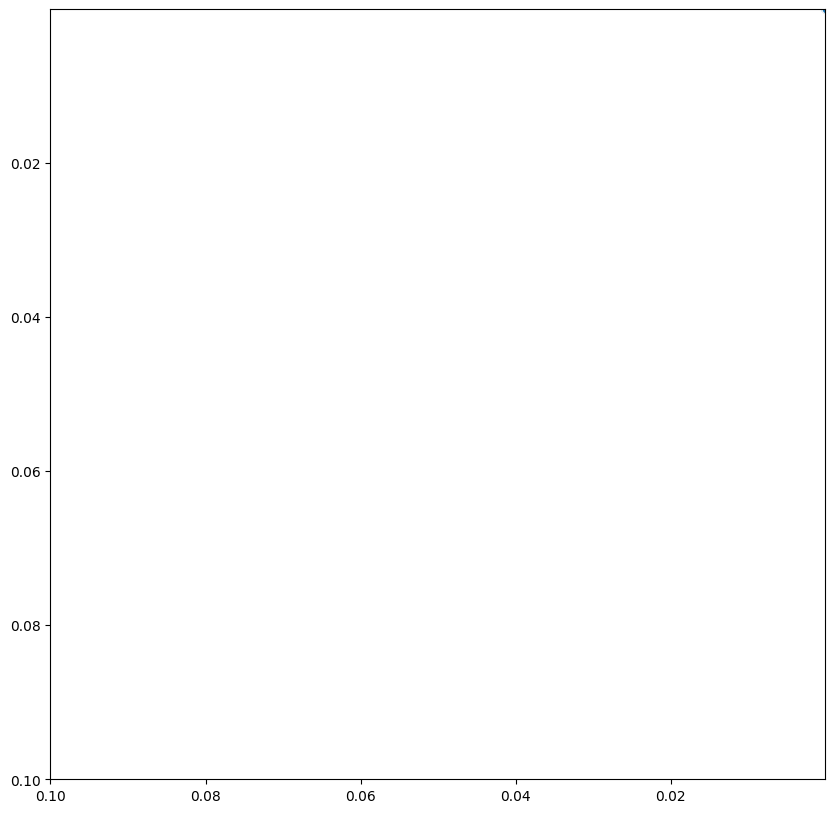

In [38]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_teste.values/1000000,y=previsao_regressao/1000000)
plt.ylim(0.10)
plt.xlim(0.10)
plt.show